In [1]:
# for general dataframe editing
import pandas as pd
import numpy as np

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for pca and pcr
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
unique_data = pd.read_csv('C:/Users/HP/Desktop/Fall 2022/Data Mining STA 5703/Project1/superconduct/unique_m.csv')
unique_data.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [3]:
train = pd.read_csv('C:/Users/HP/Desktop/Fall 2022/Data Mining STA 5703/Project1/superconduct/train.csv')
unique_data=unique_data.drop(['critical_temp','material'],axis=1)
df = pd.concat([unique_data,train],axis=1)
original_columns = len(df.columns)
original_columns
print(df.shape)
df.head()

(21263, 168)


,H,He,Li,Be,B,C,N,O,F,Ne,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
# remove all columns that have a very small variance

threshold=0.05 #this gets rid of features which are the same value 95% of the time
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=threshold).fit(df)
df = pd.DataFrame(selector.transform(df),columns=df.columns[selector.get_support()])
df.shape

(21263, 132)

In [5]:
correlation_threshhold = 0.1

corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature','critical_temp':'corr'}).loc[1:]

low_correlated_features = list(corr[np.abs(corr['corr'])<=correlation_threshhold]['feature'])
df.drop(low_correlated_features,axis=1,inplace=True)
df.shape

(21263, 89)

In [6]:
#Number of values in each column
df.count()

O                    21263
S                    21263
Ca                   21263
Cu                   21263
Sr                   21263
                     ...  
range_Valence        21263
wtd_range_Valence    21263
std_Valence          21263
wtd_std_Valence      21263
critical_temp        21263
Length: 89, dtype: int64

In [7]:
#Count the number of Null values
df.isnull().sum()

O                    0
S                    0
Ca                   0
Cu                   0
Sr                   0
                    ..
range_Valence        0
wtd_range_Valence    0
std_Valence          0
wtd_std_Valence      0
critical_temp        0
Length: 89, dtype: int64

In [8]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21212 entries, 0 to 21262
Data columns (total 89 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   O                                21212 non-null  float64
 1   S                                21212 non-null  float64
 2   Ca                               21212 non-null  float64
 3   Cu                               21212 non-null  float64
 4   Sr                               21212 non-null  float64
 5   Y                                21212 non-null  float64
 6   Ba                               21212 non-null  float64
 7   Tl                               21212 non-null  float64
 8   Bi                               21212 non-null  float64
 9   number_of_elements               21212 non-null  float64
 10  mean_atomic_mass                 21212 non-null  float64
 11  wtd_mean_atomic_mass             21212 non-null  float64
 12  gmean_atomic_mass 

In [9]:
#Dimensions before pre-processing
print("\nDimensions before pre-processing:",df.shape)


Dimensions before pre-processing: (21212, 89)


In [10]:
train.columns #viewing column names

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [11]:
corr = pd.DataFrame(df.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna()
corr = corr.reset_index().rename(columns={'index:':'feature'}).loc[1:]
corr

,index,critical_temp
1,wtd_std_ThermalConductivity,0.721016
2,range_ThermalConductivity,0.687321
3,range_atomic_radius,0.653316
4,std_ThermalConductivity,0.653276
5,wtd_mean_Valence,-0.632005
...,...,...
84,mean_atomic_mass,-0.112918
85,wtd_mean_ElectronAffinity,0.110881
86,wtd_gmean_ElectronAffinity,-0.107587
87,mean_atomic_radius,0.106327


In [12]:
# correlation matrix
corr_mat = train.corr()
corr_mat

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


In [13]:
#Obtain Correlation of each factor and the response

Atomic_mass = train.iloc[:,1:11].corr()
Fie = train.iloc[:,11:21].corr()
Atomic_radius = train.iloc[:,21:31].corr()
Density = train.iloc[:,31:41].corr()
ElectronAffinity = train.iloc[:,41:51].corr()
Fusion_heat = train.iloc[:,51:61].corr()
Thermal_conductivity = train.iloc[:,61:71].corr()
Valence = train.iloc[:,71:81].corr()

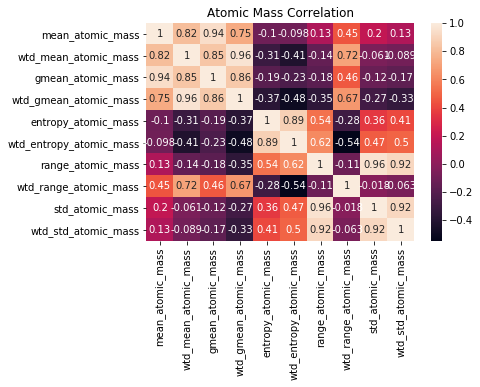

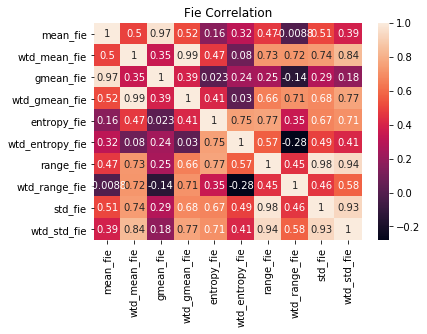

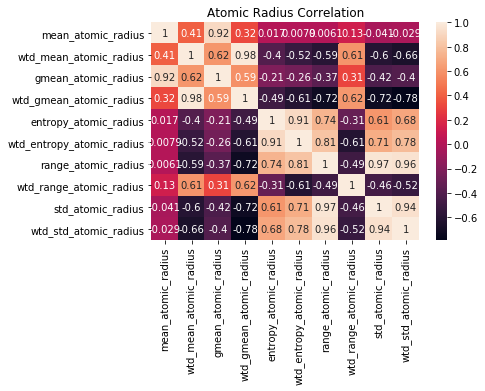

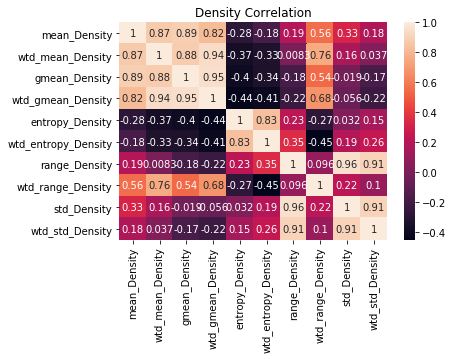

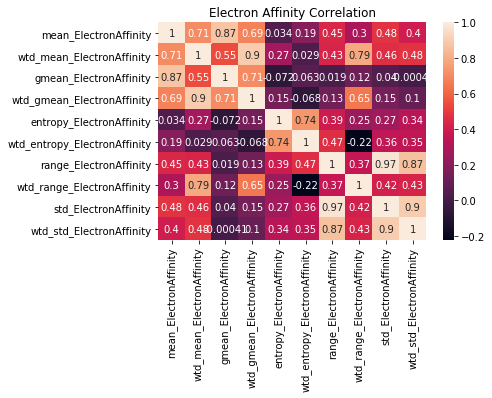

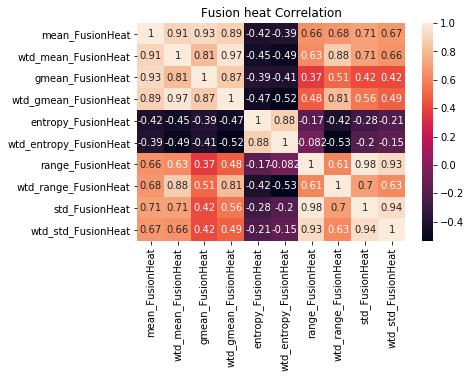

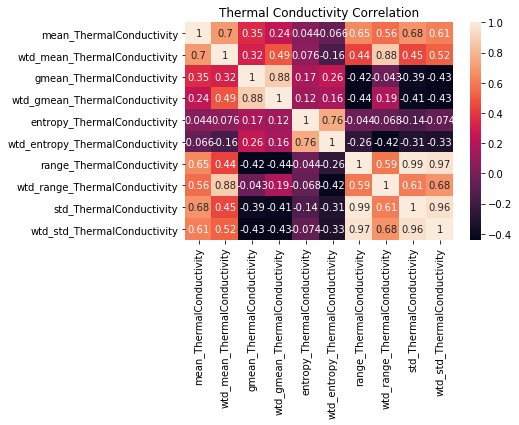

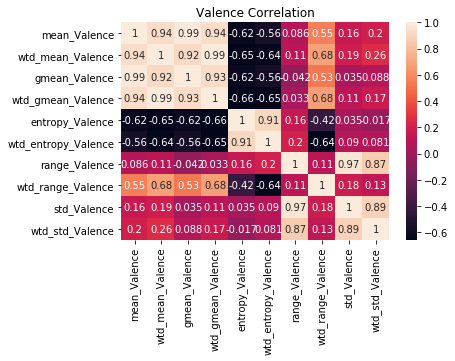

In [14]:
#plot the heatmap for correlation

sns.heatmap(Atomic_mass,annot=True)
plt.title("Atomic Mass Correlation")
#Atomic_mass.drop(['gmean_atomic_mass','range_atomic_mass','wtd_std_atomic_mass','wtd_gmean_atomic_mass'],axis=1,inplace=True)
plt.show()
sns.heatmap(Fie,annot=True)
plt.title("Fie Correlation")
Fie.drop(['gmean_fie','wtd_gmean_fie','std_fie'],axis=1,inplace=True)
plt.show()
sns.heatmap(Atomic_radius,annot=True)
plt.title("Atomic Radius Correlation")
Atomic_radius.drop(['gmean_atomic_radius','wtd_gmean_atomic_radius','range_atomic_radius','std_atomic_radius'],axis=1,inplace=True)
plt.show()
sns.heatmap(Density,annot=True)
plt.title("Density Correlation")
Density.drop(['gmean_Density','wtd_gmean_Density','std_Density'],axis=1,inplace=True)
plt.show()
sns.heatmap(ElectronAffinity,annot=True)
plt.title("Electron Affinity Correlation")
ElectronAffinity.drop(['gmean_ElectronAffinity','wtd_gmean_ElectronAffinity','std_ElectronAffinity'],axis=1,inplace=True)
plt.show()
sns.heatmap(Fusion_heat,annot=True)
plt.title("Fusion heat Correlation")
Fusion_heat.drop(['gmean_FusionHeat','wtd_gmean_FusionHeat','std_FusionHeat'],axis=1,inplace=True)
plt.show()
sns.heatmap(Thermal_conductivity,annot=True)
plt.title("Thermal Conductivity Correlation")
Thermal_conductivity.drop(['gmean_ThermalConductivity','wtd_gmean_ThermalConductivity','std_ThermalConductivity'],axis=1,inplace=True)
plt.show()
sns.heatmap(Valence,annot=True)
plt.title("Valence Correlation")
Valence.drop(['gmean_Valence','wtd_gmean_Valence','std_Valence'],axis=1,inplace=True)
plt.show()

In [15]:
#df1 = pd.read_csv('unique_m.csv').drop(['critical_temp','material'],axis=1)
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']

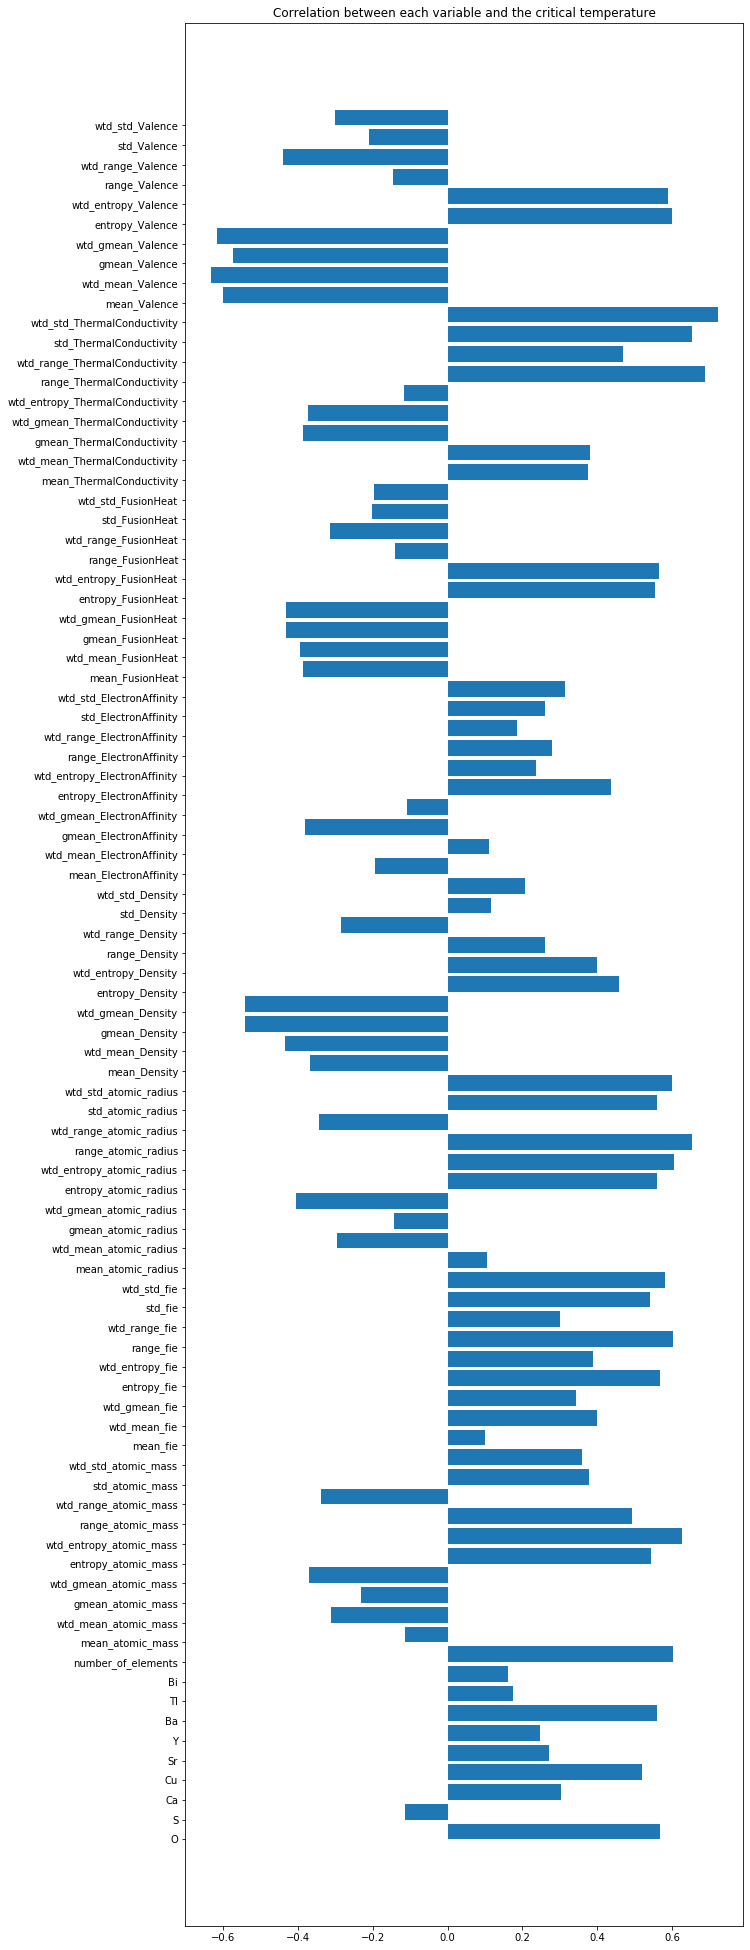

In [16]:
correlation = {}
for x in X.columns:
    correlation[x] = np.corrcoef(X[x],y)[0,1]
correlations = pd.DataFrame.from_dict(correlation,orient='index').reset_index()
correlations.rename(columns={'index':'Name',0:'Correlation coefficient'},inplace=True)
plt.figure(figsize=(10,35))
plt.barh(correlations['Name'],correlations['Correlation coefficient'],align='edge')
plt.title('Correlation between each variable and the critical temperature')
plt.show()

In [17]:
threshold = 0.6
highly_correlated = []
plt.figure(figsize=(20,10))
for index,x in enumerate(X.columns):
    correlation = np.corrcoef(X[x],y)[0,1]
    if np.abs(correlation)>threshold:
        highly_correlated.append(x)
    else:
        pass

    
corr = df[highly_correlated].corr()
corr.style.background_gradient()

,number_of_elements,wtd_entropy_atomic_mass,range_fie,wtd_entropy_atomic_radius,range_atomic_radius,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence
number_of_elements,1.000000,0.881666,0.780538,0.903869,0.767247,0.695240,0.600972,0.664786,-0.647462,-0.658208
wtd_entropy_atomic_mass,0.881666,1.000000,0.744223,0.961410,0.773918,0.688699,0.618502,0.684302,-0.643826,-0.649781
range_fie,0.780538,0.744223,1.000000,0.797252,0.908514,0.682505,0.640917,0.669741,-0.730255,-0.745692
wtd_entropy_atomic_radius,0.903869,0.961410,0.797252,1.000000,0.812096,0.690006,0.620386,0.675454,-0.659561,-0.676740
range_atomic_radius,0.767247,0.773918,0.908514,0.812096,1.000000,0.735226,0.696478,0.735364,-0.755878,-0.761020
range_ThermalConductivity,0.695240,0.688699,0.682505,0.690006,0.735226,1.000000,0.987836,0.965342,-0.742888,-0.725153
std_ThermalConductivity,0.600972,0.618502,0.640917,0.620386,0.696478,0.987836,1.000000,0.955485,-0.713938,-0.694709
wtd_std_ThermalConductivity,0.664786,0.684302,0.669741,0.675454,0.735364,0.965342,0.955485,1.000000,-0.734685,-0.714667
wtd_mean_Valence,-0.647462,-0.643826,-0.730255,-0.659561,-0.755878,-0.742888,-0.713938,-0.734685,1.000000,0.994918
wtd_gmean_Valence,-0.658208,-0.649781,-0.745692,-0.676740,-0.761020,-0.725153,-0.694709,-0.714667,0.994918,1.000000


<Figure size 1440x720 with 0 Axes>

In [18]:
# list of all the predictor variables
predictors = ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']

In [19]:
# design matrix
X = train[predictors].values

# response vector
y = train['critical_temp'].values

label = train['critical_temp']

(0, 180)

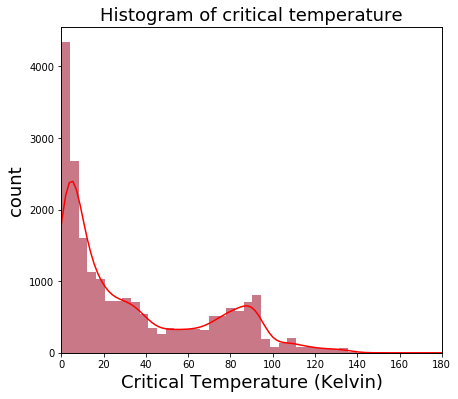

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Histogram of critical temperature',fontsize=18)
ax1 = sns.distplot(y, kde=False)
# Creating another Y axis
second_ax1 = ax1.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(y, ax=second_ax1, kde=True, hist=True,color="red")
#Removing Y ticks from the second axis
second_ax1.set_yticks([])
ax1.set_ylabel('count',fontsize=18)
ax1.set_xlabel('Critical Temperature (Kelvin)',fontsize=18)
plt.xlim(0,180)

In [21]:
#df1 = pd.read_csv('unique_m.csv').drop(['critical_temp','material'],axis=1)
X = train.drop('critical_temp',axis=1)
y = train['critical_temp']

In [22]:
#split the data into training and test batches
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [23]:
#normalize the data
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)
print(type(scaled_X_train))
print(scaled_X_train.shape)

<class 'numpy.ndarray'>
(14884, 81)


In [24]:
#Use PCA to reduce dimensions
pca=PCA(0.90)
train_data=pca.fit_transform(scaled_X_train)
train_data = pd.DataFrame(train_data)
test_data=pca.transform(scaled_X_test)

print("The explained variance ratios are:\n",pca.explained_variance_ratio_)
print("\nThe total variance in the data is :",pca.explained_variance_ratio_.sum())
print("\nThe number of components:",pca.n_components_)

The explained variance ratios are:
 [0.38984961 0.10372094 0.09574401 0.07838508 0.05866997 0.03798628
 0.03640241 0.03131361 0.02361432 0.01953116 0.01841625 0.01477365]

The total variance in the data is : 0.9084072941869226

The number of components: 12


In [25]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.279042,0.152434,-1.407670,-0.514986,-3.377579,-1.845004,-1.065201,3.323605,1.904951,0.683185,-2.716255,-1.409126
1,-5.238912,-0.420590,-0.580038,-0.240389,-0.254442,-3.073226,-0.111859,-0.076481,1.411350,-0.653868,0.123707,0.526250
2,5.547948,-4.205299,-1.953613,0.735424,-1.959361,0.035167,-0.552298,-2.452912,1.249514,2.608344,0.550193,1.671233
3,-0.567769,5.903181,3.127389,-0.208256,-4.226230,-0.254204,1.185152,1.907428,0.948968,-0.060192,-0.985624,0.156491
4,-2.160782,-1.427058,1.590457,-0.692063,1.118757,4.194871,-1.713745,0.812239,-1.231138,2.251042,0.028121,-0.811552


In [26]:
#Linear regression
linear_model=LinearRegression()
linear_model.fit(train_data,Y_train)
Y_predicted=linear_model.predict(test_data)
print(Y_test.iloc[5:15,])
print(Y_predicted[5:15])

print("The intercept :",linear_model.intercept_)
print("\n The co-efficients are:\n",linear_model.coef_)
mse=mean_squared_error(Y_test,Y_predicted)
rmse=np.sqrt(mse)
print("The RMSE is :",rmse)
print("The R2 score:",r2_score(Y_test,Y_predicted))

3252     13.10
14085     5.40
4691     88.00
15373     0.41
13009     1.70
6243     89.00
19216    13.00
2742     84.00
1112     22.40
15810     6.00
Name: critical_temp, dtype: float64
[48.65506946 -0.70944626 65.42571399 -6.23545308  0.83497509 65.20085337
 21.48793569 54.6119675  38.28300593 23.0502033 ]
The intercept : 34.44019329985219

 The co-efficients are:
 [-3.98414184 -2.10738225  2.2278618  -1.41661051  2.50669806  3.30326563
 -0.59923357 -0.66001922 -1.89865311 -0.33795586 -3.26463599 -2.22804297]
The RMSE is : 21.877582693819228
The R2 score: 0.5945268025726214


In [27]:
#Random Forest regressor

random_forest=RandomForestRegressor(n_estimators=100,random_state=21,verbose=1,max_depth=10)
rfr=random_forest.fit(X_train,Y_train)
RF_predicted=random_forest.predict(X_test)
RF_RMSE=np.sqrt(mean_squared_error(Y_test,RF_predicted))
print("THE RMSE OF RF IS:",RF_RMSE)
print("The R2 score:",r2_score(Y_test,RF_predicted))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


THE RMSE OF RF IS: 10.689705341949153
The R2 score: 0.9031956324340468


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


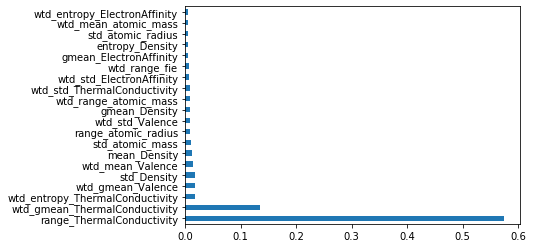

In [28]:
pd.Series(rfr.feature_importances_,index=X_train.columns[:81]).nlargest(20).plot(kind='barh')

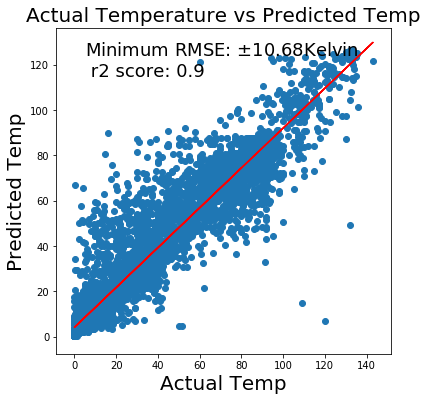

In [29]:

slope, intercept, r_value, p_value, std_err = stats.linregress(Y_test,RF_predicted)
line = slope*Y_test+intercept
plt.figure(figsize=(6,6))
plt.plot(Y_test,line,color='red')
plt.scatter(Y_test,RF_predicted)
plt.ylabel('Predicted Temp',fontsize=20)
plt.xlabel('Actual Temp',fontsize=20)
text = r'$\pm'+str(10.68)+'$'+'Kelvin \n r2 score: 0.9'
plt.text(5,115,'Minimum RMSE: '+text,fontsize=18)
plt.title('Actual Temperature vs Predicted Temp',fontsize=20)
plt.show()